In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
page_url="https://www.airlinequality.com/airline-reviews/british-airways"
pages= 38
page_size=100
reviews=[]
#in order to start from 1 to n
for i in range(1,pages + 1):
    print(f"Scraping page{i}")
    #collected data from paginated data into url
    url = f"{page_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"
    #collected HTML data from the given page
    response=requests.get(url)
    content=response.content
    parsed_content=BeautifulSoup(content,'html.parser')
    for para in parsed_content.find_all("div",{"class":"text_content"}):
        reviews.append(para.get_text())
        
        print( f" {len(reviews)} total reviews")
    
    
    

Scraping page1
 1 total reviews
 2 total reviews
 3 total reviews
 4 total reviews
 5 total reviews
 6 total reviews
 7 total reviews
 8 total reviews
 9 total reviews
 10 total reviews
 11 total reviews
 12 total reviews
 13 total reviews
 14 total reviews
 15 total reviews
 16 total reviews
 17 total reviews
 18 total reviews
 19 total reviews
 20 total reviews
 21 total reviews
 22 total reviews
 23 total reviews
 24 total reviews
 25 total reviews
 26 total reviews
 27 total reviews
 28 total reviews
 29 total reviews
 30 total reviews
 31 total reviews
 32 total reviews
 33 total reviews
 34 total reviews
 35 total reviews
 36 total reviews
 37 total reviews
 38 total reviews
 39 total reviews
 40 total reviews
 41 total reviews
 42 total reviews
 43 total reviews
 44 total reviews
 45 total reviews
 46 total reviews
 47 total reviews
 48 total reviews
 49 total reviews
 50 total reviews
 51 total reviews
 52 total reviews
 53 total reviews
 54 total reviews
 55 total reviews
 56 

In [4]:
import pandas as pd
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Very inconsiderate PA annou...
1,"✅ Trip Verified | Absolutely terrible, lost m..."
2,✅ Trip Verified | We booked premium economy r...
3,✅ Trip Verified | We chose Rotterdam and Lond...
4,✅ Trip Verified | The entire booking and ticke...


In [5]:
df

,reviews
0,✅ Trip Verified | Very inconsiderate PA annou...
1,"✅ Trip Verified | Absolutely terrible, lost m..."
2,✅ Trip Verified | We booked premium economy r...
3,✅ Trip Verified | We chose Rotterdam and Lond...
4,✅ Trip Verified | The entire booking and ticke...
...,...
3783,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3784,LHR to HAM. Purser addresses all club passenge...
3785,My son who had worked for British Airways urge...
3786,London City-New York JFK via Shannon on A318 b...


In [6]:
split_reviews = df.reviews.str.split('|', expand=True)
print(split_reviews.head())
df

                  0                                                  1
0  ✅ Trip Verified     Very inconsiderate PA announcements were mad...
1  ✅ Trip Verified     Absolutely terrible, lost my luggage on both...
2  ✅ Trip Verified     We booked premium economy round trip from Ph...
3  ✅ Trip Verified     We chose Rotterdam and London City airport b...
4  ✅ Trip Verified    The entire booking and ticketing experience h...


,reviews
0,✅ Trip Verified | Very inconsiderate PA annou...
1,"✅ Trip Verified | Absolutely terrible, lost m..."
2,✅ Trip Verified | We booked premium economy r...
3,✅ Trip Verified | We chose Rotterdam and Lond...
4,✅ Trip Verified | The entire booking and ticke...
...,...
3783,LHR-JFK-LAX-LHR. Check in was ok apart from be...
3784,LHR to HAM. Purser addresses all club passenge...
3785,My son who had worked for British Airways urge...
3786,London City-New York JFK via Shannon on A318 b...


In [7]:
import re #regular expressions
def Clean(text):
    text=re.sub('[^A-Za-z]+',' ',str(text))
    return text
df['cleaned reviews']=df["reviews"].apply(Clean)
df.head()

,reviews,cleaned reviews
0,✅ Trip Verified | Very inconsiderate PA annou...,Trip Verified Very inconsiderate PA announcem...
1,"✅ Trip Verified | Absolutely terrible, lost m...",Trip Verified Absolutely terrible lost my lug...
2,✅ Trip Verified | We booked premium economy r...,Trip Verified We booked premium economy round...
3,✅ Trip Verified | We chose Rotterdam and Lond...,Trip Verified We chose Rotterdam and London C...
4,✅ Trip Verified | The entire booking and ticke...,Trip Verified The entire booking and ticketin...


In [8]:
#using nlpt natural language toolkit 
import nltk
"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

df['POS tagged'] = df['cleaned reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,cleaned reviews,POS tagged
0,✅ Trip Verified | Very inconsiderate PA annou...,Trip Verified Very inconsiderate PA announcem...,"[(Trip, n), (Verified, n), (inconsiderate, a),..."
1,"✅ Trip Verified | Absolutely terrible, lost m...",Trip Verified Absolutely terrible lost my lug...,"[(Trip, n), (Verified, n), (Absolutely, n), (t..."
2,✅ Trip Verified | We booked premium economy r...,Trip Verified We booked premium economy round...,"[(Trip, n), (Verified, n), (booked, v), (premi..."
3,✅ Trip Verified | We chose Rotterdam and Lond...,Trip Verified We chose Rotterdam and London C...,"[(Trip, n), (Verified, n), (chose, v), (Rotter..."
4,✅ Trip Verified | The entire booking and ticke...,Trip Verified The entire booking and ticketin...,"[(Trip, n), (Verified, v), (entire, a), (booki..."


In [11]:
# Obtaining the stem words using Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,cleaned reviews,POS tagged,Lemma
0,✅ Trip Verified | Very inconsiderate PA annou...,Trip Verified Very inconsiderate PA announcem...,"[(Trip, n), (Verified, n), (inconsiderate, a),...",Trip Verified inconsiderate PA announcement ...
1,"✅ Trip Verified | Absolutely terrible, lost m...",Trip Verified Absolutely terrible lost my lug...,"[(Trip, n), (Verified, n), (Absolutely, n), (t...",Trip Verified Absolutely terrible lose lugga...
2,✅ Trip Verified | We booked premium economy r...,Trip Verified We booked premium economy round...,"[(Trip, n), (Verified, n), (booked, v), (premi...",Trip Verified book premium economy round tri...
3,✅ Trip Verified | We chose Rotterdam and Lond...,Trip Verified We chose Rotterdam and London C...,"[(Trip, n), (Verified, n), (chose, v), (Rotter...",Trip Verified choose Rotterdam London City a...
4,✅ Trip Verified | The entire booking and ticke...,Trip Verified The entire booking and ticketin...,"[(Trip, n), (Verified, v), (entire, a), (booki...",Trip Verified entire booking ticket experien...


In [61]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Very inconsiderate PA announcements were mad...,inconsiderate PA announcement make purser ap...
1,"Absolutely terrible, lost my luggage on both...",Absolutely terrible lose luggage flight deli...
2,We booked premium economy round trip from Ph...,book premium economy round trip Phoenix Zuri...
3,We chose Rotterdam and London City airport b...,choose Rotterdam London City airport conveni...
4,The entire booking and ticketing experience h...,entire booking ticket experience stressful e...
...,...,...
3783,None,None
3784,None,None
3785,None,None
3786,None,None


In [12]:
!pip install vaderSentiment

In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,cleaned reviews,POS tagged,Lemma,Sentiment,Analysis
0,✅ Trip Verified | Very inconsiderate PA annou...,Trip Verified Very inconsiderate PA announcem...,"[(Trip, n), (Verified, n), (inconsiderate, a),...",Trip Verified inconsiderate PA announcement ...,-0.9664,Negative
1,"✅ Trip Verified | Absolutely terrible, lost m...",Trip Verified Absolutely terrible lost my lug...,"[(Trip, n), (Verified, n), (Absolutely, n), (t...",Trip Verified Absolutely terrible lose lugga...,-0.9570,Negative
2,✅ Trip Verified | We booked premium economy r...,Trip Verified We booked premium economy round...,"[(Trip, n), (Verified, n), (booked, v), (premi...",Trip Verified book premium economy round tri...,0.9623,Positive
3,✅ Trip Verified | We chose Rotterdam and Lond...,Trip Verified We chose Rotterdam and London C...,"[(Trip, n), (Verified, n), (chose, v), (Rotter...",Trip Verified choose Rotterdam London City a...,0.1531,Neutral
4,✅ Trip Verified | The entire booking and ticke...,Trip Verified The entire booking and ticketin...,"[(Trip, n), (Verified, v), (entire, a), (booki...",Trip Verified entire booking ticket experien...,-0.9482,Negative


In [14]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Analysis
Positive    2191
Negative    1197
Neutral      400
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x25caa68f250>,
 [Text(-0.26821838073575643, 1.066798434679902, 'Positive'),
  Text(-0.09385146601304552, -1.0959890064809967, 'Negative'),
  Text(1.276393421122755, -0.4396815148656462, 'Neutral')],
 [Text(-0.14630093494677623, 0.5818900552799464, '57.8%'),
  Text(-0.051191708734388455, -0.5978121853532709, '31.6%'),
  Text(0.803655117003216, -0.2768365093598513, '10.6%')])

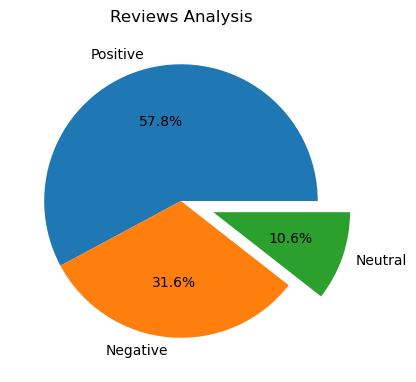

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [16]:
df.to_csv("reviews_data1.csv")

In [17]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


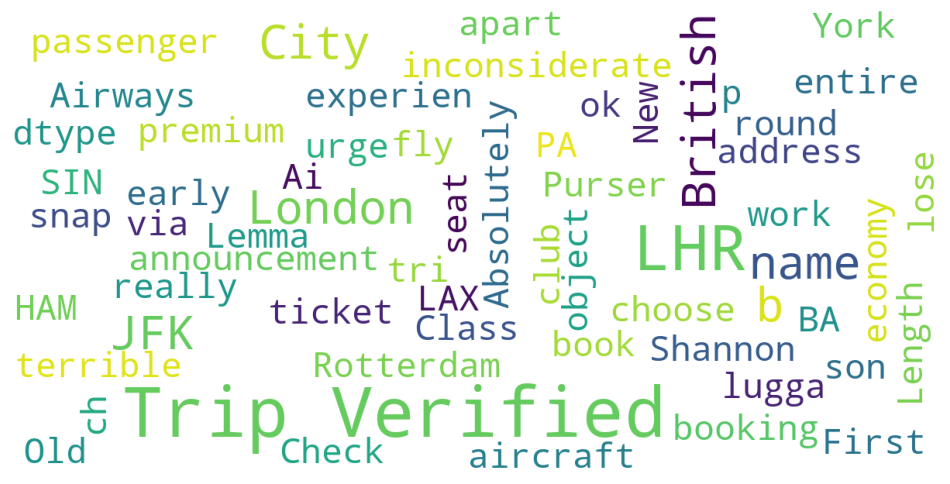

In [19]:
# Get the English stopwords list from NLTK and convert it into a set
stopwords_set = set(stopwords.words('english'))

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords_set,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud = wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

# Assuming df.Lemma contains the text data you want to visualize
show_wordcloud(df.Lemma)